In [30]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
import qiskit
import numpy as np
from qiskit.circuit.library import QFT

In [31]:
r_a = QuantumRegister(3,'a')
r_b = QuantumRegister(3,'b')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(r_a, r_b, cr)

In [32]:
def set_input_state(a, b):
    
    get_binary = lambda x : '{0:{fill}3b}'.format(x, fill='0')
    
    r_a = QuantumRegister(3, 'a')
    r_b = QuantumRegister(3, 'b')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(r_a, r_b, cr)
    
    a_binary = get_binary(a)
    
    b_binary = get_binary(b)
    
    for i in range(3):
        if a_binary[i] == '1': 
            qc.x(r_a[2-i])    
        if b_binary[i] == '1':
            qc.x(r_b[2-i])
            
    return qc, r_a, r_b, cr

def controlled_rotations(qc, reg_a, reg_b, n):
    for i in range(0,n+1):
        qc.cu1(np.pi/2**i, reg_b[n-i], reg_a[n])

In [33]:
qc, r_a, r_b, cr = set_input_state(4,3) #define os números a e b

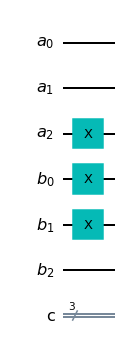

In [34]:
qc.draw('mpl')

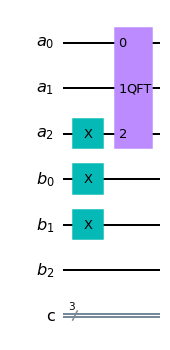

In [35]:
qc.append(QFT(3,do_swaps=False),[0,1,2])
qc.draw('mpl')

In [36]:
for i in range(0,3):
    controlled_rotations(qc, r_a, r_b, 2-i)

C:\Users\alanf\AppData\Local\Temp/ipykernel_19412/1443376575.py:24: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(np.pi/2**i, reg_b[n-i], reg_a[n])


In [37]:
qc.append(QFT(3, do_swaps=False).inverse(),[0,1,2])

In [38]:
qc.measure(r_a,cr)

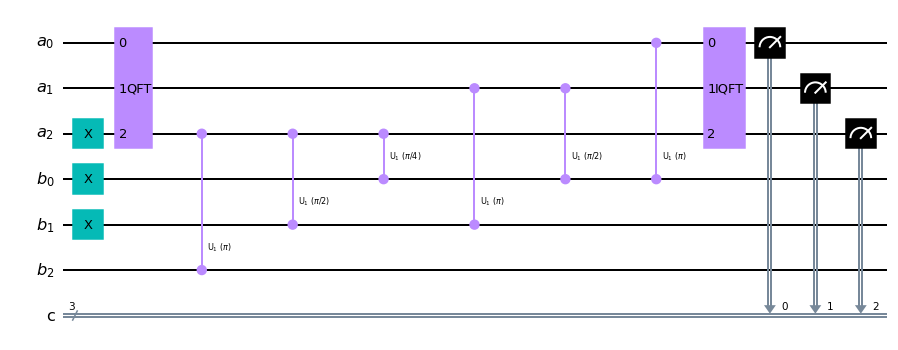

In [39]:
qc.draw('mpl')

In [40]:
backend=Aer.get_backend('qasm_simulator')
job=qiskit.execute(qc,backend,shots=100)

In [41]:
result=job.result()
counts=result.get_counts(qc)

In [42]:
print(counts)

{'111': 100}


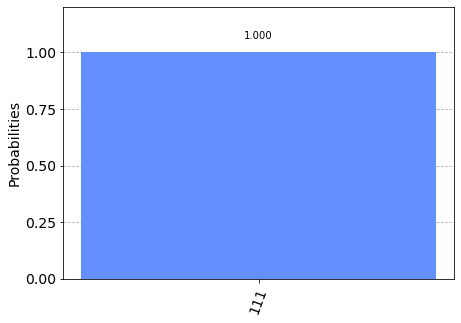

In [43]:
qiskit.visualization.plot_histogram(counts)

In [44]:
# O resultado deu |111> que em base binária é 7. 
# Note que não ocorreu nenhum erro no meio das operações, o que é traduzido em 100% de probabilidade do
# estado |111>
# Geralmente o que se ocorre em computadores quânticos reais é aparecer outras probabilidades relacionados
# a outros estados